<a href="https://colab.research.google.com/github/djasantos/PythonFundamentos/blob/master/resumo_revisao_CE_in_SA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# Importar bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# @title Ler Planilha Revisão
caminho = '/content/drive/MyDrive/Análise de Dados/Artigo de Revisão/scopus_artigos.xlsx'

# Lê a primeira aba
df_1 = pd.read_excel(caminho, sheet_name=0).set_index('Link')
# Remover Espaço no fim do nome das colunas
df_1.columns = df_1.columns.str.strip()

# Lê a segunda aba
df_2 = pd.read_excel(caminho, sheet_name=1).set_index('Link')
# Remover Espaço no fim do nome das colunas
df_2.columns = df_2.columns.str.strip()

# Renomear colunas
for coluna in df_2.columns:
  # Renomear coluna
  df_2.rename(columns={coluna: coluna + '_2'}, inplace=True)

# Mesclar baseado no índice
df_revisao = pd.merge(df_1, df_2, on='Link').reset_index()

# Remover espaço após os valores da coluna Escopo
df_revisao['Escopo'] = df_revisao['Escopo'].str.strip()
df_revisao['Escopo_2'] = df_revisao['Escopo_2'].str.strip()

#print(df_1.columns)
#print(df_2.columns)
print(df_revisao.columns)

Index(['Link', 'ID', 'Authors', 'Author full names', 'Author(s) ID', 'Title',
       'Year', 'Source title', 'Volume', 'Issue', 'Art. No.', 'Page start',
       'Page end', 'Page count', 'Cited by', 'DOI', 'Affiliations',
       'Authors with affiliations', 'Abstract', 'Funding Details', 'Publisher',
       'ISSN', 'ISBN', 'CODEN', 'Document Type', 'Publication Stage',
       'Open Access', 'Source', 'Leitor', 'Escopo', 'Tipo de evento',
       'Bioma ou região', 'País', 'Tipo de impacto, efeito', 'Metodologia',
       'Observações', 'Renata', 'Leitor_2', 'Escopo_2', 'Tipo de evento_2',
       'Observações_2'],
      dtype='object')


In [16]:
# @title Análise da revisão
df_parcial_1 = df_revisao[(df_revisao.Escopo.isin(['Não','Sim','Talvez']))]
df_parcial_2 = df_revisao[(df_revisao.Escopo_2.isin(['Não','Sim','Talvez']))]
df_parcial = df_revisao[(df_revisao.Escopo.isin(['Não','Sim','Talvez'])) & (df_revisao.Escopo_2.isin(['Não','Sim','Talvez']))]

# Porcentagem de artigos lidos
nt = len(df_revisao)
print(f'Total de artigos: {nt}\n')
# 1
np_1 = len(df_parcial_1)
porcentagem = np_1/nt*100
print(f'Porcentagem de artigos lidos nas na primeira revisão: {porcentagem:.2f}%')
# 2
np_2 = len(df_parcial_2)
porcentagem = np_2/nt*100
print(f'Porcentagem de artigos lidos na segunda revisão: {porcentagem:.2f}%')
# Total
np = len(df_parcial)
porcentagem = np/nt*100
print(f'Porcentagem de artigos lidos nas duas revisões: {porcentagem:.2f}%\n')

# Resultados divergentes e resultados iguais
df_dif = df_parcial[df_parcial['Escopo'] != df_parcial['Escopo_2']]
df_ig = df_parcial[df_parcial['Escopo'] == df_parcial['Escopo_2']]
# Gráfico de barras
print('Prévia dos resultados:')
print(f'Resultados divergentes: {len(df_dif)}')
print(f'Resultados consensuais: {len(df_ig)}')

Total de artigos: 297

Porcentagem de artigos lidos nas na primeira revisão: 100.00%
Porcentagem de artigos lidos na segunda revisão: 100.00%
Porcentagem de artigos lidos nas duas revisões: 100.00%

Prévia dos resultados:
Resultados divergentes: 100
Resultados consensuais: 197


/tmp/ipython-input-29-1170028220.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dif['Combinacao'] = df_dif[['Escopo', 'Escopo_2']].apply(lambda x: ' + '.join(sorted(x)), axis=1)


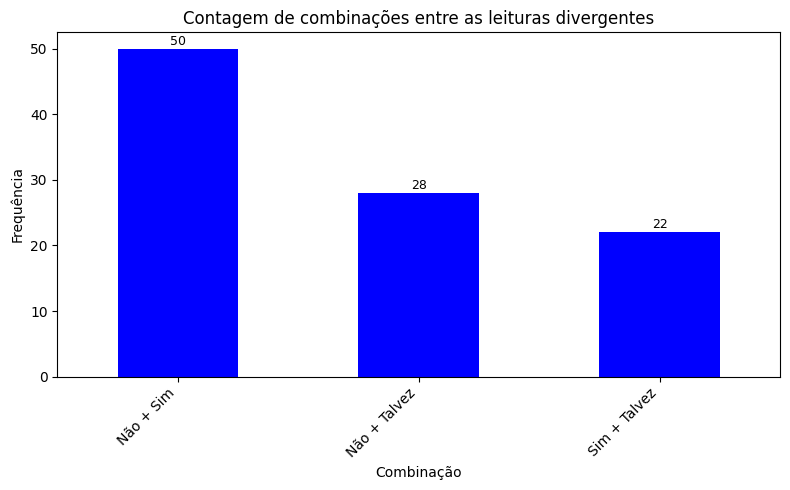

In [29]:
# @title Análise dos resultados divergentes

df_dif[['Escopo','Escopo_2']]

# Passo 1: Criar combinações ordenadas
df_dif['Combinacao'] = df_dif[['Escopo', 'Escopo_2']].apply(lambda x: ' + '.join(sorted(x)), axis=1)

# Passo 2: Contar as ocorrências de cada combinação
contagem = df_dif['Combinacao'].value_counts().sort_values(ascending=False)

# Passo 3: Plotar gráfico de barras
plt.figure(figsize=(8, 5))
ax = contagem.plot(kind='bar', color='blue')
plt.title('Contagem de combinações entre as leituras divergentes')
plt.xlabel('Combinação')
plt.ylabel('Frequência')
plt.xticks(rotation=45, ha='right')

# Adicionar os valores em cima das barras
for i, v in enumerate(contagem):
    ax.annotate(str(v), xy=(i, v), xytext=(0, 3), textcoords='offset points', ha='center', fontsize=9)

plt.tight_layout()
plt.show()


/tmp/ipython-input-35-3048644842.py:19: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(x=evento.index, hue=evento.index, legend=False, y=evento.values, ax = axs[1], palette = sns.dark_palette("yellow", n_colors=4))


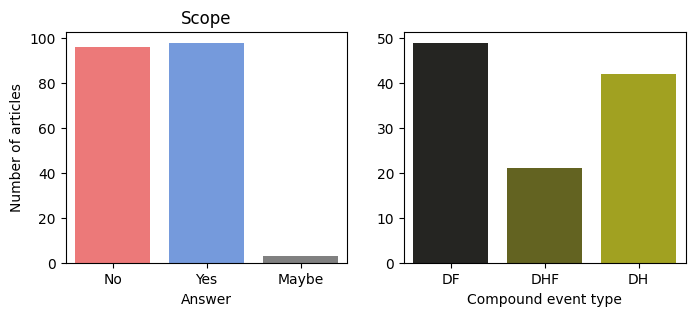

In [35]:
# @title Análise dos resultados consensuais

escopo = df_ig.groupby('Escopo')['ID'].count()
escopo.rename(index={'Sim': 'Yes', 'Não': 'No', 'Talvez': 'Maybe'}, inplace=True)
evento = df_ig.groupby('Tipo de evento')['ID'].count().drop("-")
evento.rename(index={'Drought/ Fire':'DF', 'Drought/ Heat/Fire ':'DHF', 'Drought/Heat':'DH'}, inplace=True)

# Criar figura com 2 subplots
fig, axs = plt.subplots(ncols =  2, figsize=(8, 3))

# Gráfico Escopo
sns.barplot(x=escopo.index, hue=escopo.index, legend=False, y=escopo.values, ax = axs[0], palette=['#FF6666','#6495ED','gray'])
# Renomear eixo x
axs[0].set_xlabel('Answer')
axs[0].set_ylabel('Number of articles')
axs[0].set_title('Scope')

# Gráfico Evento
sns.barplot(x=evento.index, hue=evento.index, legend=False, y=evento.values, ax = axs[1], palette = sns.dark_palette("yellow", n_colors=4))
# Renomear eixo x
axs[1].set_xlabel('Compound event type')
axs[1].set_ylabel('')
plt.show()


/tmp/ipython-input-18-3462453952.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="bioma", y="N", data=df_biomas, palette="cividis")


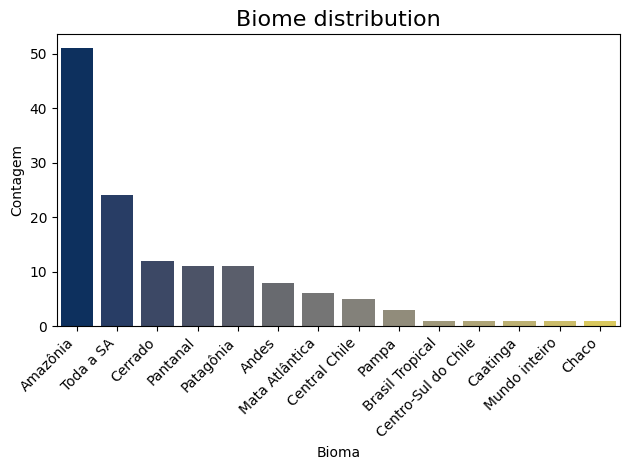

In [18]:
# @title Análise biomas
bioma = df_ig.groupby('Bioma ou região')['ID'].count().reset_index().rename(columns={'Bioma ou região': 'bioma'})

df_biomas = pd.DataFrame()
for index, linha in bioma.iterrows():
  biomas = linha.bioma.split(",")
  if "-" in biomas:
    biomas.remove("-")
  if "-," in biomas:
    biomas.remove("-,")
  for bioma_ in biomas:
    df_aux = pd.DataFrame(data=[{"bioma":bioma_.replace(",", "").strip(),"N":linha.ID}])
    df_biomas = pd.concat([df_biomas, df_aux], ignore_index=True)

df_biomas = df_biomas.groupby(by = "bioma")['N'].sum().reset_index()
df_biomas = df_biomas.sort_values(by="N", ascending=False).reset_index(drop=True)

# Gráfico de barras com seaborn
sns.barplot(x="bioma", y="N", data=df_biomas, palette="cividis")

plt.xticks(rotation=45, ha='right')
plt.xlabel("Bioma")
plt.ylabel("Contagem")
plt.title("Biome distribution", fontsize=16)
plt.tight_layout()
plt.show()

/tmp/ipython-input-19-1973162446.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="pais", y="N", data=df_paises, palette="cividis")


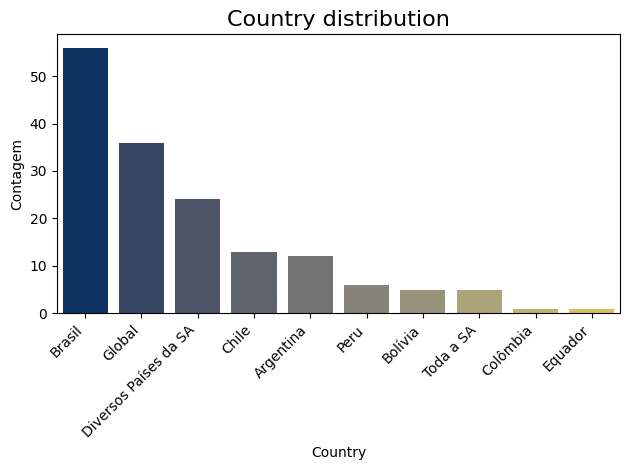

In [19]:
# @title Análise biomas e países e impactos

pais = df_ig.groupby('País')['ID'].count().reset_index().rename(columns={'País': 'pais'})
impacto = df_ig.groupby('Tipo de impacto, efeito')['ID'].count().reset_index()

df_paises = pd.DataFrame()
for index, linha in pais.iterrows():
  paiss = linha.pais.split(",")
  if "-" in paiss:
    paiss.remove("-")
  if "-," in paiss:
    paiss.remove("-,")
  for pais_ in paiss:
    df_aux = pd.DataFrame(data=[{"pais":pais_.replace(",", "").strip(),"N":linha.ID}])
    df_paises = pd.concat([df_paises, df_aux], ignore_index=True)

df_paises = df_paises.groupby(by = "pais")['N'].sum().reset_index()
df_paises = df_paises.sort_values(by="N", ascending=False).reset_index(drop=True)

# Gráfico de barras com seaborn
sns.barplot(x="pais", y="N", data=df_paises, palette="cividis")

plt.xticks(rotation=45, ha='right')
plt.xlabel("Country")
plt.ylabel("Contagem")
plt.title("Country distribution", fontsize=16)
plt.tight_layout()
plt.show()

/tmp/ipython-input-20-2629769607.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="impacto", y="N", data=df_impacto, palette="cividis")


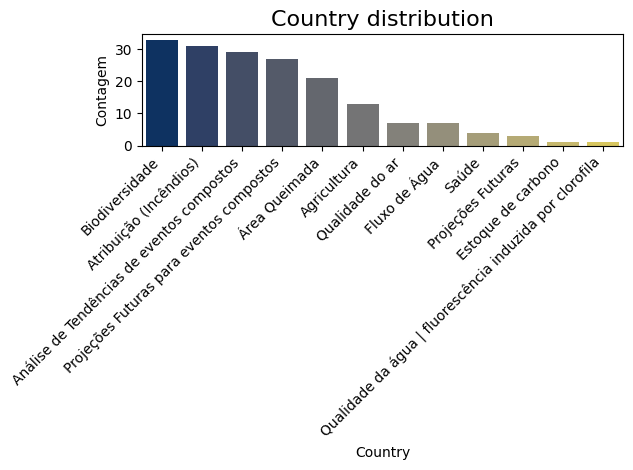

In [20]:
# @title Análise biomas e países e impactos

impacto = df_ig.groupby('Tipo de impacto, efeito')['ID'].count().reset_index().rename(columns={'Tipo de impacto, efeito': 'impacto'})

df_impacto = pd.DataFrame()
for index, linha in impacto.iterrows():
  impactos = linha.impacto.split(",")
  if "-" in impactos:
    impactos.remove("-")
  if "-," in impactos:
    impactos.remove("-,")
  for impacto_ in impactos:
    df_aux = pd.DataFrame(data=[{"impacto":impacto_.replace(",", "").strip(),"N":linha.ID}])
    df_impacto = pd.concat([df_impacto, df_aux], ignore_index=True)

df_impacto = df_impacto.groupby(by = "impacto")['N'].sum().reset_index()
df_impacto = df_impacto.sort_values(by="N", ascending=False).reset_index(drop=True)

# Gráfico de barras com seaborn
sns.barplot(x="impacto", y="N", data=df_impacto, palette="cividis")

plt.xticks(rotation=45, ha='right')
plt.xlabel("Country")
plt.ylabel("Contagem")
plt.title("Country distribution", fontsize=16)
plt.tight_layout()
plt.show()